# Web Scraping using Beautiful Soup
<hr>

Web scraping refers to the automated extraction of data from a website. 

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

Here, we scrape data about a marathon from a website using Beautiful Soup to analyze it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [36]:
url = "https://www.hubertiming.com/results/2018MLK"
html = urlopen(url)

In [37]:
soup = BeautifulSoup(html)

In [38]:
title = soup.title
print(title.text)

Race results for the 2018 MLK Dream Run!


In [39]:
print(title)

<title>Race results for the 2018 MLK Dream Run!</title>


In [40]:
links = soup.find_all('a', href=True)
for link in links:
    print(link['href'])

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [121]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
    
print(dataRow)

['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']


In [122]:
#cleaning data, removing '\r' and '\n' and spaces
new_data = []
for row in data:
    dataRowNew=[]
    for x in row:
        str = ""
        x = x.replace("\r","").replace("\n","").strip()
        str = str.join(x)
        dataRowNew.append(str)
    print(dataRowNew)
    new_data.append(dataRowNew)

[]
['Finishers:', '191']
['Male:', '78']
['Female:', '113']
[]
['1', '1191', 'MAX RANDOLPH', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '1 of 78', 'M 21-39', '1 of 33', '0:08', '16:56']
['2', '1080', 'NEED NAME KAISER RUNNER', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '2 of 78', 'M 21-39', '2 of 33', '0:09', '17:40']
['3', '1275', 'DAN FRANEK', 'M', '52', 'PORTLAND', 'OR', '5:53', '18:15', '3 of 78', 'M 40-54', '1 of 27', '0:07', '18:22']
['4', '1223', 'PAUL TAYLOR', 'M', '54', 'PORTLAND', 'OR', '5:58', '18:31', '4 of 78', 'M 40-54', '2 of 27', '0:07', '18:38']
['5', '1245', 'THEO KINMAN', 'M', '22', '', '', '6:17', '19:31', '5 of 78', 'M 21-39', '3 of 33', '0:09', '19:40']
['6', '1185', 'MELISSA GIRGIS', 'F', '27', 'PORTLAND', 'OR', '6:20', '19:39', '1 of 113', 'F 21-39', '1 of 53', '0:07', '19:46']
['7', '1251', 'CHARLIE COGGESHALL', 'M', '39', 'PORTLAND', 'OR', '6:24', '19:51', '6 of 78', 'M 21-39', '4 of 33', '0:10', '20:01']
['8', '1154', 'UNKNOWN RUNNER SEE TIMER', 'M', 

In [123]:
new_data = new_data[5:]
df = pd.DataFrame(new_data)
print(df.head(2))
print(df.tail(2))


  0     1                        2  3   4           5   6     7      8   \
0  1  1191             MAX RANDOLPH  M  29  WASHINGTON  DC  5:25  16:48   
1  2  1080  NEED NAME KAISER RUNNER  M  25    PORTLAND  OR  5:39  17:31   

        9        10       11    12     13  
0  1 of 78  M 21-39  1 of 33  0:08  16:56  
1  2 of 78  M 21-39  2 of 33  0:09  17:40  
      0     1             2  3   4         5   6      7        8           9   \
189  190  2087  LEESHA POSEY  F  43  PORTLAND  OR  30:17  1:33:53  112 of 113   
190  191  1216   ZULMA OCHOA  F  40   GRESHAM  OR  33:22  1:43:27  113 of 113   

          10        11    12       13  
189  F 40-54  36 of 37  0:00  1:33:53  
190  F 40-54  37 of 37  0:00  1:43:27  


In [124]:
#adding column headers
col_headers = soup.find_all('th')
col_headers

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>Age</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Pace</th>,
 <th>Chip Time</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>]

In [125]:
header_list = []
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Chip Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [126]:
df.columns = header_list
print(df.head())

  Place   Bib                     Name Gender Age        City State Chip Pace  \
0     1  1191             MAX RANDOLPH      M  29  WASHINGTON    DC      5:25   
1     2  1080  NEED NAME KAISER RUNNER      M  25    PORTLAND    OR      5:39   
2     3  1275               DAN FRANEK      M  52    PORTLAND    OR      5:53   
3     4  1223              PAUL TAYLOR      M  54    PORTLAND    OR      5:58   
4     5  1245              THEO KINMAN      M  22                        6:17   

  Chip Time Gender Place Age Group Age Group Place Time to Start Gun Time  
0     16:48      1 of 78   M 21-39         1 of 33          0:08    16:56  
1     17:31      2 of 78   M 21-39         2 of 33          0:09    17:40  
2     18:15      3 of 78   M 40-54         1 of 27          0:07    18:22  
3     18:31      4 of 78   M 40-54         2 of 27          0:07    18:38  
4     19:31      5 of 78   M 21-39         3 of 33          0:09    19:40  


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Chip Time        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.0+ KB


In [128]:
df.shape

(191, 14)

In [129]:
df2 = df.dropna(axis=0, how='any') #any row with null value
df2.shape

(191, 14)

### Analyzing the chip time
Chip time is another way of saying "net time," or the actual amount of time it takes a runner to go from the starting line of a race to the finish line.

In [135]:
#Before converting chip time to datatime format we need to change the format to hh:mm:ss form for all cells
r=0
for ct in df2['Chip Time']:
    if ct.count(':') == 1:
        df2['Chip Time'][r] = "00:"+(df2['Chip Time'][r])
    r=r+1
print(df2['Chip Time'][:5])

0    00:16:48
1    00:17:31
2    00:18:15
3    00:18:31
4    00:19:31
Name: Chip Time, dtype: object


In [140]:
df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'])
df2['ChipTime_minutes'] = df2['ChipTime_minutes'].astype('timedelta64[s]') / 60
df2[['ChipTime_minutes']].info()
print("\n\n")
print(df2['ChipTime_minutes'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChipTime_minutes  191 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB



0    16.800000
1    17.516667
2    18.250000
3    18.516667
4    19.516667
Name: ChipTime_minutes, dtype: float64


In [142]:
#comparing with genders
print(df2[['Gender','ChipTime_minutes']].tail())

    Gender  ChipTime_minutes
186      F         67.850000
187      F         68.200000
188      M         69.183333
189      F         93.883333
190      F        103.450000


Text(0.5, 1.0, 'Comparison of average minutes run by male and female')

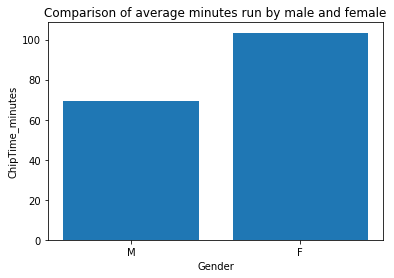

In [145]:
plt.bar(df2['Gender'], df2['ChipTime_minutes'])
plt.xlabel('Gender')
plt.ylabel('ChipTime_minutes')
plt.title("Comparison of average minutes run by male and female")

In [146]:
df2.describe(include=[np.number])

,ChipTime_minutes
count,191.000000
mean,42.478185
std,14.903030
min,16.800000
25%,29.041667
50%,39.500000
75%,54.216667
max,103.450000


#### Obtaining descriptive stats on the data

<AxesSubplot:>

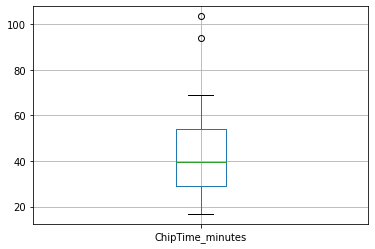

In [147]:
df2.boxplot(column='ChipTime_minutes')

Text(0, 0.5, 'Run time')

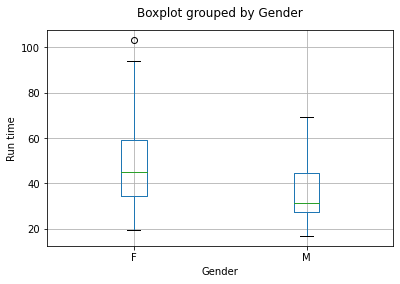

In [149]:
df2.boxplot(column='ChipTime_minutes', by='Gender')
plt.title('')
plt.ylabel('Run time')

#### Comparing Chip time with age

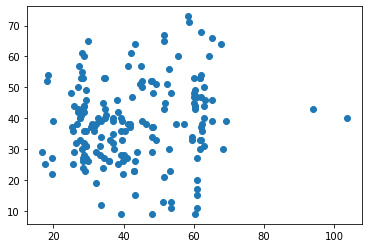

In [153]:
#age vs Chip time in minutes
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how='any', inplace = True)

plt.scatter(df2['ChipTime_minutes'], df2['Age_i'])
plt.show()